In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [116]:
t = np.linspace(0.01, 4.6, 50)  # Gyr

m = -0.39354186
m_err = 0.15938645
b = -1.906516
b_err = 0.21192405

n = 5000
f_S = 10**(b + b_err * np.random.randn(n)[:, None]) * t ** (m + m_err * np.random.randn(n)[:, None])

In [117]:
lower_env, upper_env = np.percentile(f_S, [16, 84], axis=0)

In [135]:
names = ['V1298 Tau', 'DS Tuc A', 'Qatar-4', 'Kepler-411', 'Kepler-289', 'EPIC 247589423', 'K2-100', 'K2-101', 'Kepler-50', 'Sun', 'Kepler-21']
ages = [0.023, 0.045, 0.170, 0.212, 0.65, 0.65, 0.687, 0.790, 3.59, 4.60, 2.60]
for name, age in zip(names, ages):
    lo = 10 ** np.interp(np.log10(age), np.log10(t), np.log10(lower_env))
    mid = 10 ** np.interp(np.log10(age), np.log10(t), np.log10(10**b * t ** m))
    hi = 10 ** np.interp(np.log10(age), np.log10(t), np.log10(upper_env))

    print(name, f"$f_S = {{{mid:.3f}}}^{{+{hi-mid:.3f}}}_{{-{mid-lo:.3f}}}$")

V1298 Tau $f_S = {0.055}^{+0.064}_{-0.030}$
DS Tuc A $f_S = {0.042}^{+0.043}_{-0.021}$
Qatar-4 $f_S = {0.025}^{+0.019}_{-0.011}$
Kepler-411 $f_S = {0.023}^{+0.017}_{-0.010}$
Kepler-289 $f_S = {0.015}^{+0.009}_{-0.006}$
EPIC 247589423 $f_S = {0.015}^{+0.009}_{-0.006}$
K2-100 $f_S = {0.014}^{+0.009}_{-0.006}$
K2-101 $f_S = {0.014}^{+0.009}_{-0.005}$
Kepler-50 $f_S = {0.007}^{+0.005}_{-0.003}$
Sun $f_S = {0.007}^{+0.005}_{-0.003}$
Kepler-21 $f_S = {0.009}^{+0.006}_{-0.003}$


In [133]:
dstuc = np.load('data/dstuc.npy')
v1298 = np.load('data/v1298.npy')
kep411 = np.load('data/kepler411.npy')
qatar4 = np.load('data/qatar4.npy')
kep289 = np.load('data/kepler289.npy')
k2100 = np.load('data/k2100.npy')
k2101 = np.load('data/k2101.npy')
epic2475 = np.load('data/epic2475.npy')
kep21 = np.load('data/kepler21.npy')
kep50 = np.load('data/kepler50.npy')

In [142]:
kep21[0]

0.0012355569617502557

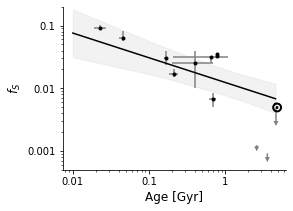

In [150]:
fig, ax = plt.subplots(figsize=(4, 3))

formatter = dict(fmt='.', ecolor='gray', color='k')
ax.errorbar(0.023, v1298[0], xerr=0.004, 
            yerr=v1298[1:3][::-1][:, None], **formatter)
ax.errorbar(0.045, dstuc[0], xerr=0.004, 
            yerr=dstuc[1:3][::-1][:, None], **formatter)
ax.errorbar(0.170, qatar4[0], xerr=0.010, 
            yerr=qatar4[1:3][::-1][:, None], **formatter)
ax.errorbar(0.212, kep411[0], xerr=0.031, 
            yerr=kep411[1:3][::-1][:, None], **formatter)
ax.errorbar(0.400, 0.025, xerr=[[0.2], [0.3]], 
            yerr=[[0.015], [0.015]], **formatter)
ax.errorbar(0.650, kep289[0], xerr=0.44, 
            yerr=kep289[1:3][::-1][:, None], **formatter)
ax.errorbar(0.687, epic2475[0], xerr=0.063, 
            yerr=epic2475[1:3][::-1][:, None], **formatter)
ax.errorbar(0.790, k2100[0], xerr=0.030, 
            yerr=k2100[1:3][::-1][:, None], **formatter)
ax.errorbar(0.790, k2101[0], xerr=0.030, 
            yerr=k2101[1:3][::-1][:, None], **formatter)
# ax.errorbar(2.60, kep21[0], xerr=0.16, 
#             yerr=kep21[1:3][::-1][:, None], **formatter)
# ax.errorbar(3.59, kep50[0], xerr=0.16, 
#             yerr=kep50[1:3][::-1][:, None], **formatter)
ax.annotate('', xy=(2.6, kep21[0] - 0.00025), xytext=(2.6, kep21[0]), 
            arrowprops=dict(facecolor='gray', shrink=0., lw=0., 
                            width=1.5, headwidth=5, headlength=5),
            zorder=-30)

ax.annotate('', xy=(3.59, kep50[0] - 0.00025), xytext=(3.59, kep50[0]), 
            arrowprops=dict(facecolor='gray', shrink=0., lw=0., 
                            width=1.5, headwidth=5, headlength=5),
            zorder=-30)


ax.scatter(4.6, 0.005, marker='$\odot$', color='k', s=100)
ax.annotate('', xy=(4.66, 0.0025), xytext=(4.66, 0.005), 
            arrowprops=dict(facecolor='gray', shrink=0., lw=0., 
                            width=1.5, headwidth=5, headlength=5),
            zorder=-30)


ax.loglog(t, 10**b * t ** m, color='k')

yticks = [0.001, 0.01, 0.10]
ax.set_yticks(yticks)
ax.set_yticklabels(["{0:g}".format(i) for i in yticks])
ax.set_ylim([0.0005, 0.2])
xticks = [0.01, 0.1, 1, 10]
ax.set_xticks(xticks)
ax.set_xticklabels(["{0:g}".format(i) for i in xticks])

ax.set_xlabel('Age [Gyr]', fontsize=12)
ax.set_ylabel('$f_S$', fontsize=12)
ax.fill_between(t, lower_env, upper_env, alpha=0.2, color='silver', zorder=-10)

for sp in ['right', 'top']:
    ax.spines[sp].set_visible(False)
    
fig.savefig('plots/fs_comparison.pdf', bbox_inches='tight')